<a href="https://colab.research.google.com/github/Noir1607/Data-Science/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar datos y limpieza

Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   , Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline

Formatear

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

Importar datos

In [ ]:
df = pd.read_csv("/content/ds_salaries.csv")

Visualizar los datos

In [ ]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Revisar si hay nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Eliminamos "unnamed" porque solo es una columna de indices

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Revisar cuantos elementos unicos hay

In [ ]:
for i in df.columns:
  print("Columna de :" + i)
  print(df[i].unique())

Columna de :work_year
[2020 2021 2022]
Columna de :experience_level
['MI' 'SE' 'EN' 'EX']
Columna de :employment_type
['FT' 'CT' 'PT' 'FL']
Columna de :job_title
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machin

Revisar la cantidad de elementos unicos

In [ ]:
df.nunique()

,0
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3
company_location,50


Revisar como estan conformadas las columnas categoricas

In [ ]:
columnas_no_numericas = df.select_dtypes(exclude=['number'])
columnas_no_numericas.head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,EUR,DE,DE,L
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S
2,SE,FT,Big Data Engineer,GBP,GB,GB,M
3,MI,FT,Product Data Analyst,USD,HN,HN,S
4,SE,FT,Machine Learning Engineer,USD,US,US,L


Observar como estan constituias esas columnas categoricas

In [ ]:
columnas_no_numericas.describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.00,607.00,607.00,607.00
mean,2021.41,324000.06,112297.87,70.92
std,0.69,1544357.49,70957.26,40.71
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,70000.00,62726.00,50.00
50%,2022.00,115000.00,101570.00,100.00
75%,2022.00,165000.00,150000.00,100.00
max,2022.00,30400000.00,600000.00,100.00


In [ ]:
df.duplicated().sum()

42

Observar los elementos que dicen ser duplicados

In [ ]:
print(df[df.duplicated(keep=False)])

     work_year experience_level employment_type       job_title  salary  \
119       2021               MI              FT   Data Engineer  200000   
181       2021               MI              FT  Data Scientist   76760   
217       2021               MI              FT  Data Scientist   76760   
256       2021               MI              FT   Data Engineer  200000   
303       2022               SE              FT  Data Scientist  123000   
..         ...              ...             ...             ...     ...   
587       2022               SE              FT  Data Scientist  140000   
588       2022               SE              FT    Data Analyst   99000   
592       2022               SE              FT  Data Scientist  230000   
596       2022               SE              FT  Data Scientist  210000   
597       2022               SE              FT    Data Analyst  170000   

    salary_currency  salary_in_usd employee_residence  remote_ratio  \
119             USD         

In [ ]:
#Borrarlos
df.drop_duplicates(inplace=True)

# EDA

In [ ]:
def treemap(job_titles):
    #Contar cada elemento , se importa el Counter
    title_counts = Counter(job_titles)

    # Convertir Counter a un diccionario
    title_data = {"Job Title": list(title_counts.keys()), "Frequency": list(title_counts.values())}

    # Crear un DataFrame
    df = pd.DataFrame(title_data)

    # Acomodar el df por la frecuencia de aparcicion
    df = df.sort_values(by='Frequency', ascending=False)

    # Crear el mapa
    fig = go.Figure(go.Treemap(
        labels=df['Job Title'],
        parents=[''] * len(df),
        values=df['Frequency']
    ))

    # Actualizar el titulo
    fig.update_layout(title='Job Titles Treemap')

    # Ensenar el treemap
    fig.show()

In [ ]:
job_titles = df["job_title"]
treemap(job_titles)

Son muchos tipos de puesto y podria ser algo complicado codificar cada uno de ellos, asi que lo dividimos en las top 3 categorias del arbol pasado

In [ ]:
def categorizar_titulos(title):
    if 'Analyst' in title or "Data Lead" in title:
        return 'Data Analyst'
    elif 'Scientist' in title or "Science" in title or "Researcher" in title:
        return 'Data Scientist'
    elif 'Engineer' in title or 'Architect' in title or 'Developer' in title or "Programmer" in title:
        return 'Data Engineer'
    else:
        return 'Other'

In [ ]:
# Aplicar la funcion
df['job_type'] = df['job_title'].apply(categorizar_titulos)
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_type
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Data Scientist
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Data Engineer
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,Data Analyst
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,Data Scientist
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,Data Scientist
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L,Data Analyst
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S,Data Engineer


<ipython-input-370-423039f7a97f>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




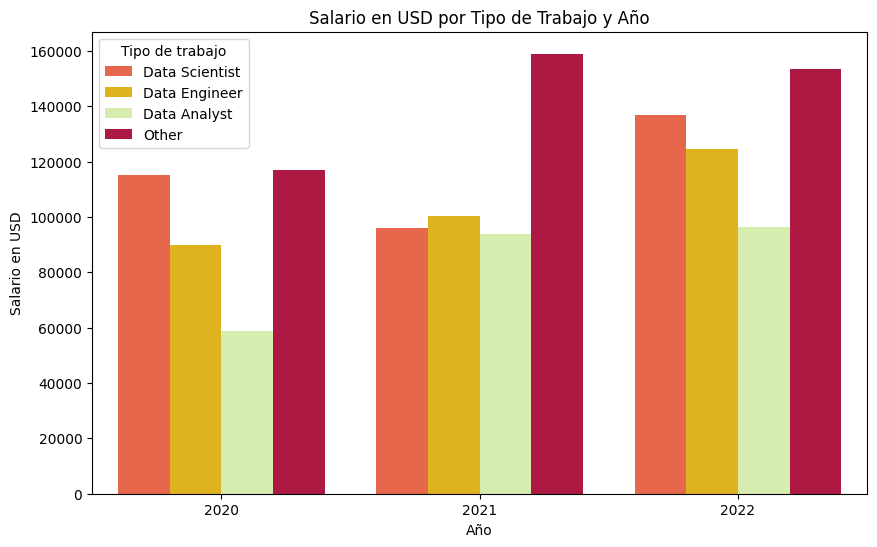

In [ ]:
# Vamos a ver la divsion de estos puestos
plt.figure(figsize=(10, 6))
sns.barplot(data = df, x = 'work_year', y = 'salary_in_usd', hue = 'job_type', ci = None,
           palette = sns.color_palette(['#FF5733', '#FFC300', '#DAF7A6', '#C70039']))
plt.title('Salario en USD por Tipo de Trabajo y Año')
plt.xlabel('Año')
plt.ylabel('Salario en USD')
plt.legend(title= 'Tipo de trabajo')
plt.show()

In [ ]:
# Definir si se encuentra en el pais o es internacional para reducir las categorias
def categorizar_pais(country):
    if 'US' not in country:
        return 'International'
    else:
        return 'US'

# Aplicamos la funcion y creamos esta nueva columna
df['work_country'] = df['employee_residence'].apply(categorizar_pais)
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_type,work_country
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist,International
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Data Scientist,International
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer,International
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analyst,International
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Data Engineer,US
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,Data Analyst,US
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,Data Scientist,US
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,Data Scientist,International
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L,Data Analyst,US
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S,Data Engineer,International


In [ ]:
# Definir si es remoto , hibrido o en la oficina
def categorize_remote(remote):
    if remote == 100:
        return 'Fully Remote'
    elif remote == 50:
        return 'Hybrid'
    else:
        return 'In Office'

In [ ]:
df['remote_status'] = df['remote_ratio'].apply(categorize_remote)
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_type,work_country,remote_status
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist,International,In Office
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Data Scientist,International,In Office
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer,International,Hybrid
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analyst,International,In Office
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Data Engineer,US,Hybrid
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,Data Analyst,US,Fully Remote
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,Data Scientist,US,Fully Remote
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,Data Scientist,International,Hybrid
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L,Data Analyst,US,Fully Remote
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S,Data Engineer,International,Hybrid


In [ ]:
def buscar_nomadas(df):
    different_country = df[df['employee_residence'] != df['company_location']]

    fully_remote = different_country[different_country['remote_ratio'] == 100]

    return fully_remote

In [ ]:
remote_workers = buscar_nomadas(df)
print(remote_workers.head())

    work_year experience_level employment_type           job_title  salary  \
17       2020               SE              FT   Big Data Engineer  100000   
19       2020               MI              FT  Lead Data Engineer   56000   
32       2020               SE              FT      Data Scientist   60000   
40       2020               MI              FT      Data Scientist   45760   
53       2020               EN              FT       Data Engineer   48000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
17             EUR         114047                 PL           100   
19             USD          56000                 PT           100   
32             EUR          68428                 GR           100   
40             USD          45760                 PH           100   
53             EUR          54742                 PK           100   

   company_location company_size        job_type   work_country remote_status  
17               GB           

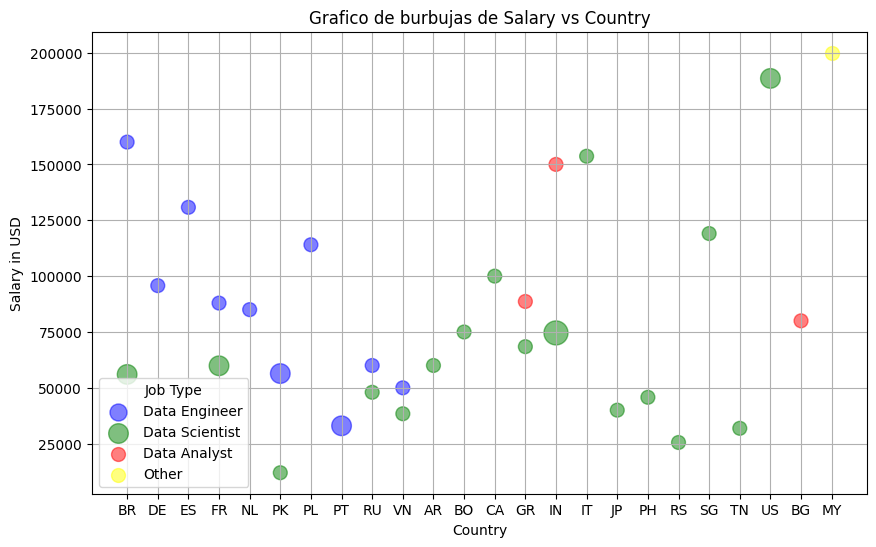

In [ ]:
# Agrupar los grupos
grouped = remote_workers.groupby(['employee_residence', 'job_type']).agg({'salary_in_usd': 'mean', 'work_year': 'count'}).reset_index()
grouped.rename(columns={'work_year': 'count'}, inplace=True)

# Definir colores
colors = {'Data Engineer': 'blue', 'Data Scientist': 'green', 'Data Analyst' : 'red', 'Other' : 'yellow'}

# Definir nuestro plot para que sea de burbuja
plt.figure(figsize=(10, 6))
for job_type, color in colors.items():
    subset = grouped[grouped['job_type'] == job_type]
    plt.scatter(subset['employee_residence'], subset['salary_in_usd'], s=subset['count']*100, color=color, alpha=0.5, label=job_type)

plt.title('Grafico de burbujas de Salary vs Country')
plt.xlabel('Country')
plt.ylabel('Salary in USD')
plt.legend(title='Job Type')
plt.grid(True)
plt.show()

Una vez finalizadas las columnas categoricas , vamos a revisar las numericas

In [ ]:
columnas_numericas = df.select_dtypes(include=['number'])

Creamos una funcion que me imprima las cajas para revisar si tiene outliers

In [ ]:
def boxplots(numericas):
  for column in numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=numericas)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

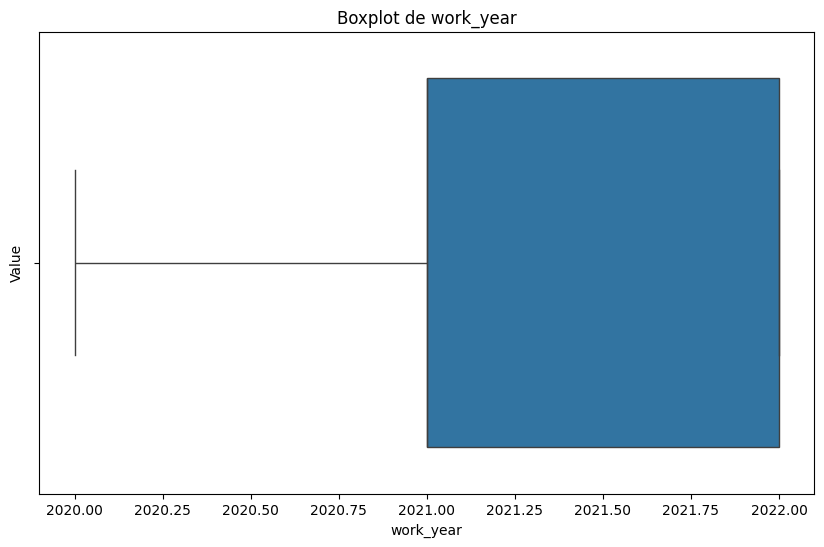

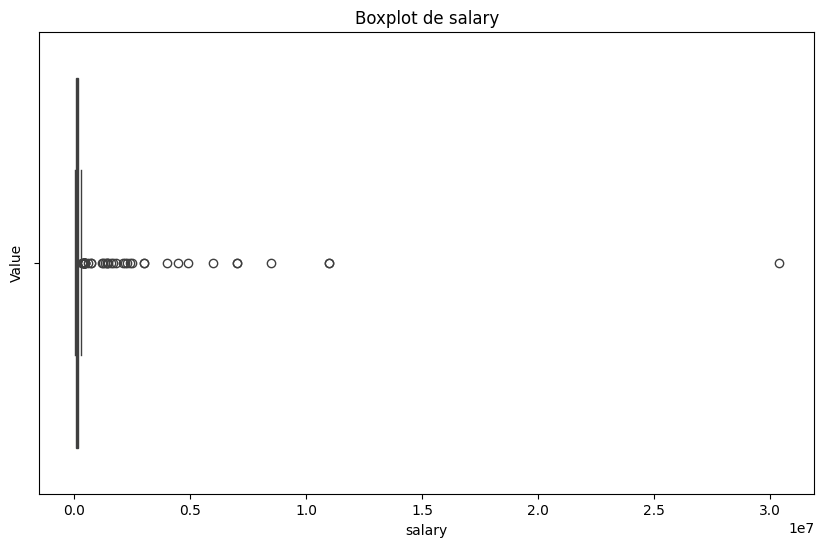

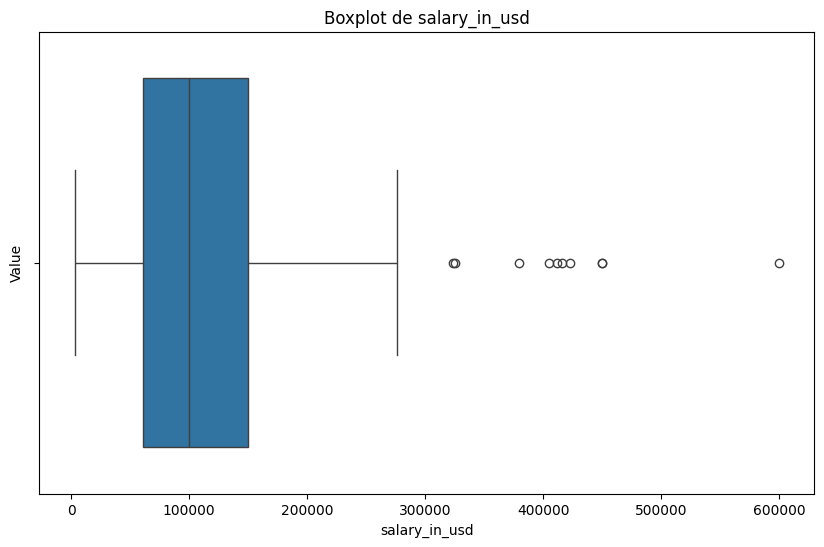

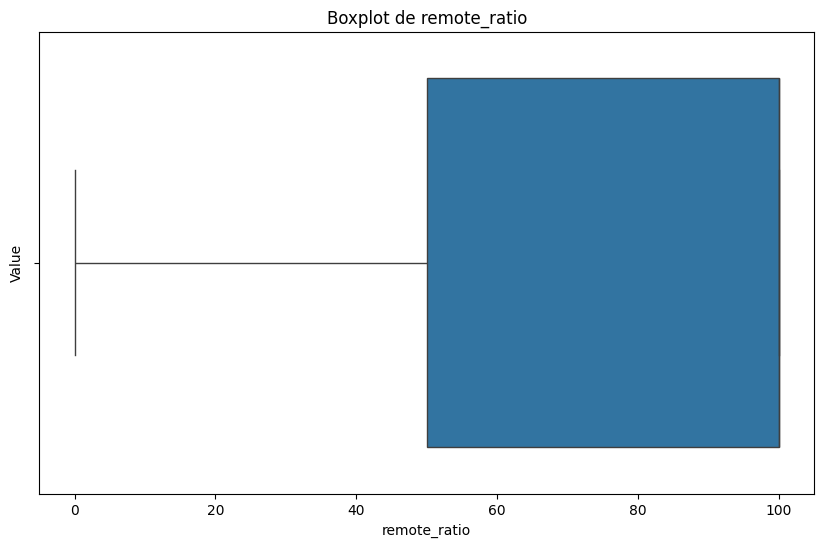

In [ ]:
boxplots(columnas_numericas)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_type,work_country,remote_status
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist,International,In Office
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Data Scientist,International,In Office
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer,International,Hybrid
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analyst,International,In Office
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Data Engineer,US,Hybrid


Vamos a eliminar estas columnas porque no son utiles para el modelo , año solo es un indice de tiempo , salario es una columna que ya tenemos y queremos hacer nuestra prediccion en dolares , asi igual la moneda nos es inutil , y el resto de columnas son solo las que son sin convertir , ya fueron remplzadas por las nuevas

In [ ]:
#Copiar el df
df_model = df.copy()
df_model.drop(["work_year", "salary","job_title","salary_currency", "employee_residence", "company_location", "remote_ratio"],
                  axis = 1, inplace= True)
df_model.head()

,experience_level,employment_type,salary_in_usd,company_size,job_type,work_country,remote_status
0,MI,FT,79833,L,Data Scientist,International,In Office
1,SE,FT,260000,S,Data Scientist,International,In Office
2,SE,FT,109024,M,Data Engineer,International,Hybrid
3,MI,FT,20000,S,Data Analyst,International,In Office
4,SE,FT,150000,L,Data Engineer,US,Hybrid


Como vimos anteiormente en las cajas , hay valores outliers y hay algunos que podrian ser acomodados asi que vamos a hacer eso

In [ ]:
def remove_outliers(df, columna):
    # Calcular Cuartiles , osea el primero que es ek 0.25 y el maximo que es el 0.75
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)

    # Calcular el interquartil
    IQR = Q3 - Q1

    # Definir el rango bajo y el alto para identificar los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar el df para quitar los outliers
    df_filtrado = df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]

    return df_filtrado

In [ ]:
df_limpio = remove_outliers(df_model, 'salary_in_usd')

#df Limpiado
df_limpio.head()

,experience_level,employment_type,salary_in_usd,company_size,job_type,work_country,remote_status
0,MI,FT,79833,L,Data Scientist,International,In Office
1,SE,FT,260000,S,Data Scientist,International,In Office
2,SE,FT,109024,M,Data Engineer,International,Hybrid
3,MI,FT,20000,S,Data Analyst,International,In Office
4,SE,FT,150000,L,Data Engineer,US,Hybrid


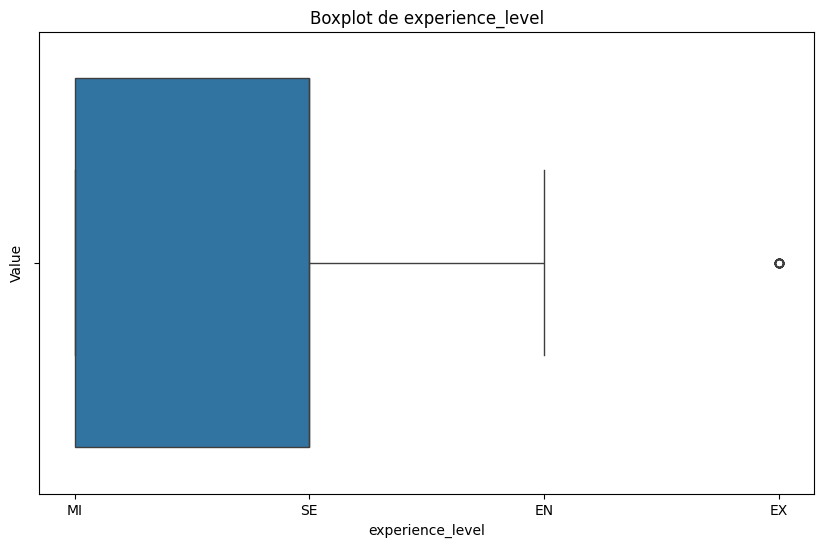

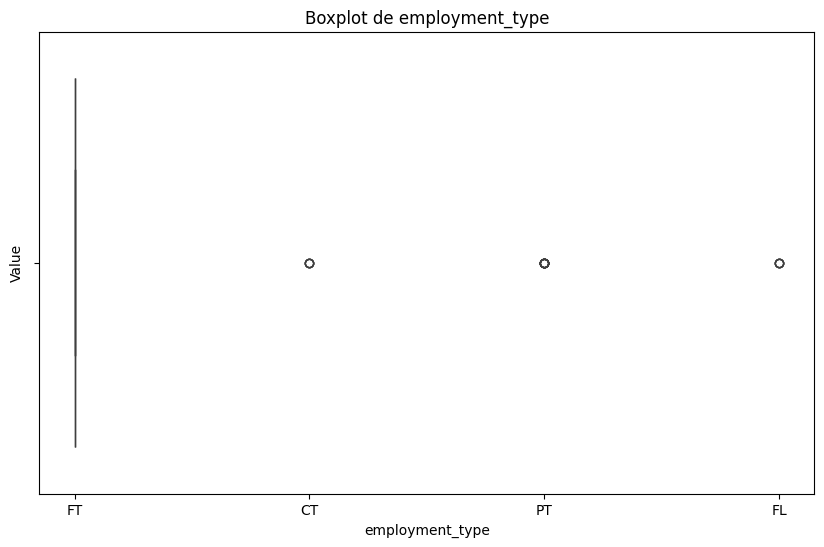

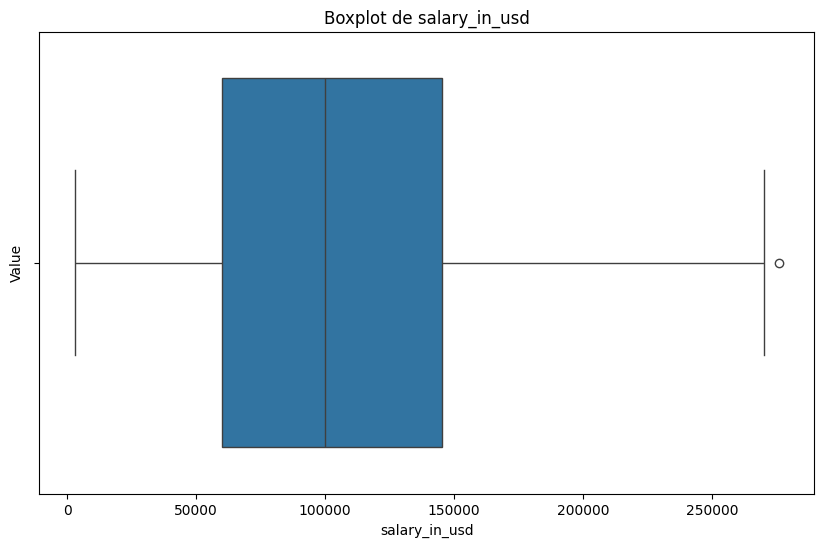

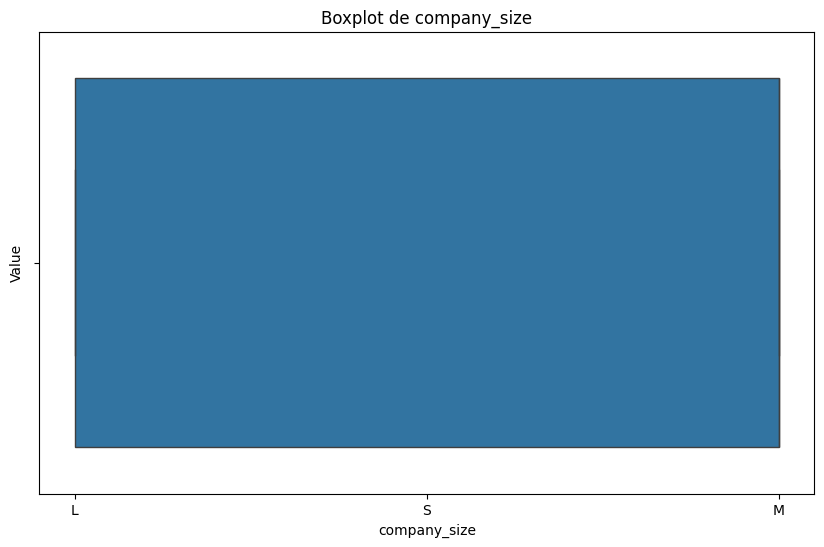

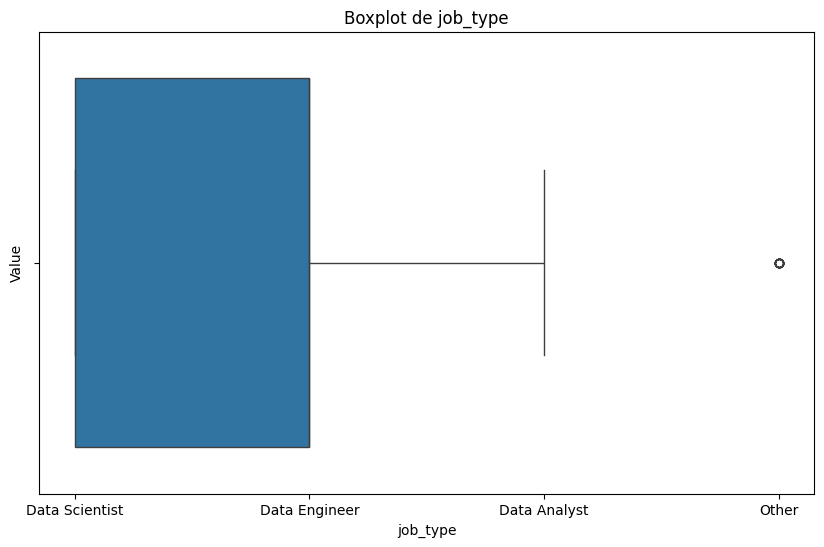

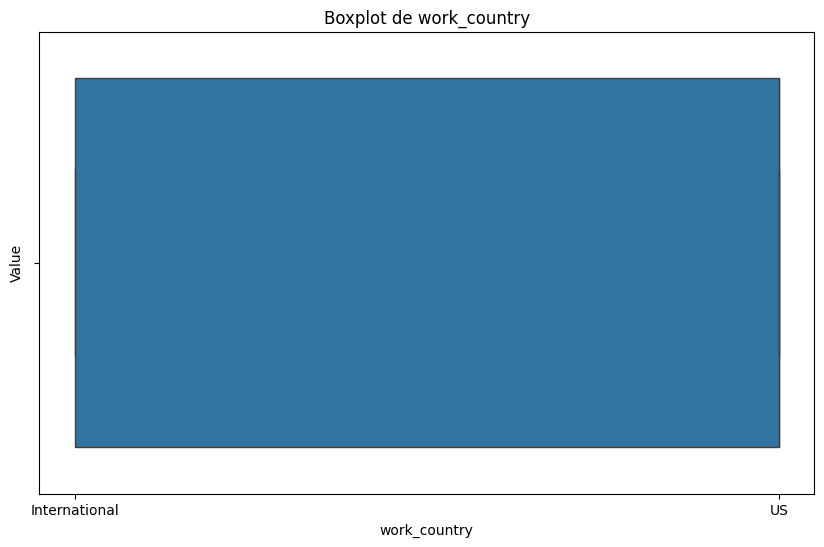

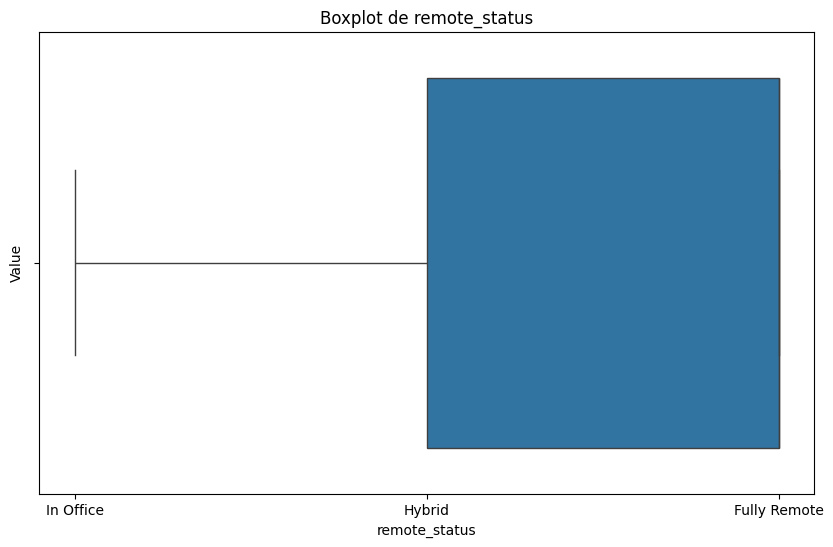

In [ ]:
boxplots(df_limpio)

In [ ]:
df_limpio.head()

,experience_level,employment_type,salary_in_usd,company_size,job_type,work_country,remote_status
0,MI,FT,79833,L,Data Scientist,International,In Office
1,SE,FT,260000,S,Data Scientist,International,In Office
2,SE,FT,109024,M,Data Engineer,International,Hybrid
3,MI,FT,20000,S,Data Analyst,International,In Office
4,SE,FT,150000,L,Data Engineer,US,Hybrid


# Codificacion

In [ ]:
categorical_cols = ['experience_level', 'employment_type', 'company_size', 'job_type', 'work_country', 'remote_status']
numerical_col = ["salary_in_usd"]

encoder = OneHotEncoder(drop='first', sparse_output=False)

# Codificar las columnas segun su respectivo codificador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_col),  # Standarizar la numerica
        ('cat', encoder, categorical_cols)  # Dummies de la otra
    ])

# Aplicarle la codificacion
processed_data = preprocessor.fit_transform(df_limpio)

# Convertirlo a df
df_procesado = pd.DataFrame(processed_data)

# Conseguir las columnas originales
columnas_originales = numerical_col + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Asignar el nombre para cada columna correspodiente
df_procesado.columns = columnas_originales

df_procesado.head()

,salary_in_usd,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,job_type_Data Engineer,job_type_Data Scientist,job_type_Other,work_country_US,remote_status_Hybrid,remote_status_In Office
0,-0.43,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,2.63,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
2,0.07,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
3,-1.44,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0.76,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00


In [ ]:
# Ordenar las columnas poniendo los dummies al inicio
dummies = [col for col in df_procesado.columns if col not in df_limpio.columns]
originals = [col for col in df_procesado.columns if col in df_limpio.columns]
new_order = dummies + originals

X = df_procesado[new_order]

In [ ]:
X.head()

,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,job_type_Data Engineer,job_type_Data Scientist,job_type_Other,work_country_US,remote_status_Hybrid,remote_status_In Office,salary_in_usd
0,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-0.43
1,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.63
2,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.07
3,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,-1.44
4,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.76


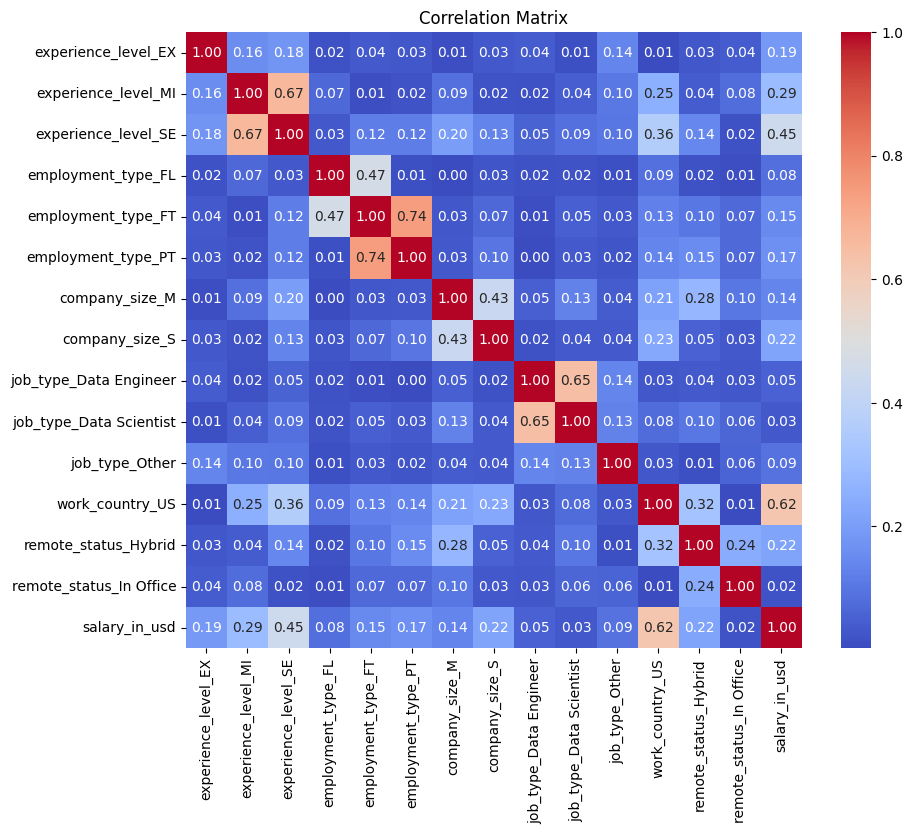

In [ ]:
# Matriz de correlacion
correlation_matrix = X.corr().abs()

# Visualizar la matriz de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Definir cuanta correlacion queremos
correlacion = 0.6

high_corr = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > correlacion:
            colname_elimnar = correlation_matrix.columns[i]
            colname_corr = correlation_matrix.columns[j]
            porcentaje_correlacion = correlation_matrix.iloc[i, j]

            high_corr.append({'Eliminar': colname_elimnar, 'Columna_correlacion':colname_corr, 'correlacion': porcentaje_correlacion})

In [ ]:
df_high_corr = pd.DataFrame(high_corr)
df_high_corr

,Eliminar,Columna_correlacion,correlacion
0,experience_level_SE,experience_level_MI,0.67
1,employment_type_PT,employment_type_FT,0.74
2,job_type_Data Scientist,job_type_Data Engineer,0.65
3,salary_in_usd,work_country_US,0.62


In [ ]:
columns = df_high_corr.Eliminar.unique()

In [ ]:
y = X['salary_in_usd']

In [ ]:
X = X.drop(columns=columns)

# Modelado de datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(444, 11)

Text(0, 0.5, 'Residuos')

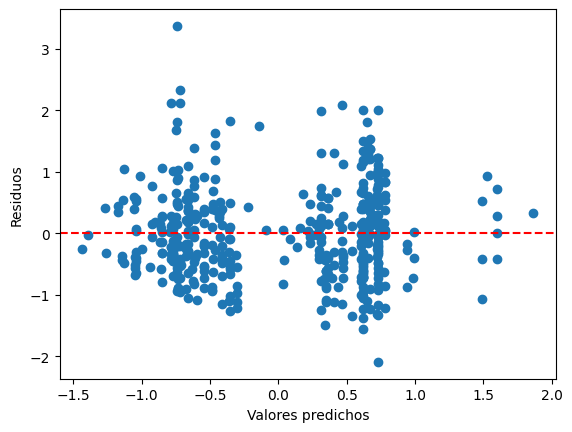

In [ ]:
# Ajustar un modelo de regresion lineal simple
lineal_model = LinearRegression()
lineal_model.fit(X_train, y_train)
y_pred_train = lineal_model.predict(X_train)
y_pred_test = lineal_model.predict(X_test)

# Calcular los residuos
residuos = y_train - y_pred_train

# Visualizar los residuos
plt.scatter(y_pred_train, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')

In [ ]:
# Si los residuos se distribuyen aleatoriamente alrededor de cero, se considera lineal

residual_model = LinearRegression()
residual_model.fit(y_pred_train.reshape(-1, 1), residuos)


LinearRegression()

In [ ]:
# Obtener el coeficiente de la regresion sobre los residuos
residual_slope = residual_model.coef_[0]
is_linear = np.abs(residual_slope) < 1e-5
print(f"El modelo es lineal: {is_linear}")

El modelo es lineal: True


In [ ]:
# Definir los modelos lineales y no lineales

linear_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest': RandomForestRegressor()

}

nonlinear_models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Polynomial Regression (degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Polynomial Regression (degree 3)': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
}


In [ ]:
selected_models = linear_models if is_linear else nonlinear_models

In [ ]:
selected_models

{'Linear Regression': LinearRegression(),
 'Ridge Regression': Ridge(),
 'Lasso Regression': Lasso(),
 'ElasticNet Regression': ElasticNet(),
 'Random Forest': RandomForestRegressor()}

Ver los modelos seleccionados

In [ ]:
results = {}

for name, model in selected_models.items():
  print(name)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = {'MSE': mse, 'R2': r2}

Linear Regression
Ridge Regression
Lasso Regression
ElasticNet Regression
Random Forest


Obeservar los resultados

In [ ]:
pd.DataFrame(results).T

,MSE,R2
Linear Regression,0.61,0.37
Ridge Regression,0.60,0.37
Lasso Regression,0.96,-0.00
ElasticNet Regression,0.96,-0.00
Random Forest,0.69,0.28


In [ ]:
results

{'Linear Regression': {'MSE': 0.6073898230533612, 'R2': 0.3668682697411062},
 'Ridge Regression': {'MSE': 0.6044409606809915, 'R2': 0.36994210842797826},
 'Lasso Regression': {'MSE': 0.9594949170627691,
  'R2': -0.00015945930854877055},
 'ElasticNet Regression': {'MSE': 0.9594949170627691,
  'R2': -0.00015945930854877055},
 'Random Forest': {'MSE': 0.6931092779687538, 'R2': 0.27751592179657414}}

Me gusta RandomForest asi que escogi ese

In [ ]:
def backward_elimination_rf(x, y, SL):
    numVars = x.shape[1]
    for i in range(0, numVars):
        model = RandomForestRegressor(n_estimators=100)
        model.fit(x, y)
        importances = model.feature_importances_
        if max(importances) < SL:
            x = np.delete(x, np.argmax(importances), 1)
        else:
            break
    return x

# Suponiendo que X y y son tus datos
SL = 0.03  # Establece un umbral para la importancia de características
X_opt = backward_elimination_rf(X, y, SL)

Seleccion de caracteristicas y umbral en 3 para que me de 0.5

In [ ]:
X = X_opt

Volver a entrenar el modelo

In [ ]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Rf_model = RandomForestRegressor(n_estimators=100)
Rf_model.fit(X_train_v2, y_train_v2)

RandomForestRegressor()

In [ ]:
y_pred_v2 = Rf_model.predict(X_test_v2)
mse2 = mean_squared_error(y_test_v2, y_pred_v2)
r2_v2= r2_score(y_test, y_pred)
results2 = {'MSE': mse2, 'R2': r2_v2}

In [ ]:
pd.DataFrame(results2, index=['Random Forest']).T

,Random Forest
MSE,0.69
R2,0.28


In [ ]:
X_train_v3 , X_test_v3, y_train_v3, y_test_v3 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Lasso_model = Lasso()
Lasso_model.fit(X_train_v3, y_train_v3)

Lasso()

In [ ]:
y_pred_v3 = Lasso_model.predict(X_test_v3)
mse3 = mean_squared_error(y_test_v3, y_pred_v3)
r2_v3= r2_score(y_test, y_pred)
results3 = {'MSE': mse3, 'R2': r2_v3}

In [ ]:
results3

{'MSE': 0.9594949170627691, 'R2': 0.27751592179657414}

In [ ]:
pd.DataFrame(results3, index=['Lasso']).T

,Lasso
MSE,0.96
R2,0.28


#Generar PKl

In [ ]:
import pickle
with open('modelo_final.pkl', 'wb') as f:
    pickle.dump(Rf_model, f)

In [ ]:
with open('modelo_final_1.pkl', 'wb') as f:
    pickle.dump(Lasso_model, f)

In [ ]:
# Leer pkl
with open('modelo_final.pkl', 'rb') as f:
    modelo_final_predicciones = pickle.load(f)

In [ ]:
# Leer pkl
with open('modelo_final_1.pkl', 'rb') as f:
    modelo_final_predicciones1 = pickle.load(f)

In [ ]:
modelo_final_predicciones

RandomForestRegressor()

In [ ]:
modelo_final_predicciones1

Lasso()

In [ ]:
modelo_final_predicciones.predict(X_test_v2)

array([-0.47039038,  0.51145325,  0.6153365 ,  0.54872226, -0.00374027,
       -0.75362254, -0.75362254, -0.00374027,  1.05308067,  0.75606571,
        0.6153365 ,  0.49641325,  0.95944256, -0.82418642, -0.0152656 ,
       -0.68917062, -0.76777125,  0.45104447,  0.34287708,  0.49641325,
       -0.69988659,  0.29440645, -0.28861284, -1.07332688,  0.24157491,
       -0.01768814,  0.75606571,  0.11830861, -1.14262631,  0.54872226,
        0.16404171,  0.75606571,  1.22657149,  0.6153365 ,  0.49641325,
        1.05308067,  0.96649875,  0.44689816, -1.05578098,  0.34287708,
        0.75606571,  0.49641325,  0.95944256,  0.51145325, -0.89449437,
        0.16404171,  0.96649875, -0.77352071,  0.29440645, -0.56371932,
       -0.04763163, -0.56371932,  0.75606571, -0.56371932,  0.96649875,
        0.34287708,  1.10528284,  0.49641325,  0.49641325,  0.89938287,
        0.49641325, -0.77352071,  0.75606571, -0.90896631,  0.44689816,
        0.49641325,  0.75606571, -1.2212443 , -0.68917062,  0.75

In [ ]:
modelo_final_predicciones1.predict(X_test_v3)

array([-0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00247367,
       -0.00247367, -0.00247367, -0.00247367, -0.00247367, -0.00